In [99]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, model_selection, preprocessing, datasets

In [100]:
# Collecting the data

data = datasets.load_iris()
print(dir(data))

df = pd.DataFrame(data.data, columns = data.feature_names)
df.drop(['petal length (cm)', 'petal width (cm)'], axis = 1, inplace = True)
df.head()

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [101]:
# Clustering the data 

## Scaling the features

scaler = preprocessing.MinMaxScaler()

scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])

scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)'] = scaler.transform(df[['sepal width (cm)']])

kmeans = cluster.KMeans(n_clusters = 3)

y_predicted = kmeans.fit_predict(df)
print(kmeans.score(df[['sepal length (cm)', 'sepal width (cm)']]))
df.head()

-4.115194202754065


,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


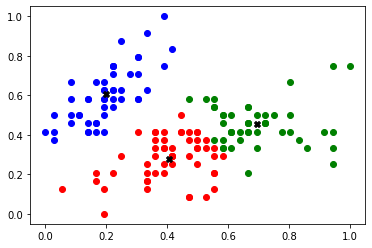

In [102]:
# Visualizing the clusters through matplotlib

df['cluster'] = y_predicted

## Grouping the dataframes based on the clusters

df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

centroids = kmeans.cluster_centers_

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = "red")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = "blue")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = "green")
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "X", color = "black")

df.head()

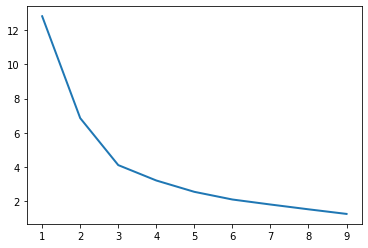

In [103]:
# Calculating the sum of squared error and drawing the elbow graph

sse = []

for k in range(1, 10):
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans.fit(df[['sepal length (cm)', 'sepal width (cm)']])
    sse.append(kmeans.inertia_)

# Plotting the elbow graph ()  (sse vs k)

plt.plot(range(1, 10), sse, lw = 2)  ## Elbow at k = 3
plt.show()